In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_harm = 32
div_ratio = 48000/440

In [3]:
ddelay = np.ceil(div_ratio) + np.arange(-n_harm, n_harm)

In [4]:
phase_delay = -2*np.pi*ddelay[None, :]/div_ratio*np.arange(1, n_harm+1)[:, None]

In [5]:
lhs = np.concatenate((np.cos(phase_delay), np.sin(phase_delay)))

In [6]:
rhs = np.concatenate((np.ones(n_harm), np.zeros(n_harm)))

In [7]:
coeffs = np.linalg.solve(lhs, rhs)

In [8]:
coeffs

array([ 1.28498944e-10, -2.95983906e-09,  3.36381902e-08, -2.53401096e-07,
        1.42767930e-06, -6.42014395e-06,  2.39789236e-05, -7.63420828e-05,
        2.10797531e-04, -5.10467934e-04,  1.09060147e-03, -2.05705493e-03,
        3.40352150e-03, -4.84780487e-03,  5.66381805e-03, -4.64222067e-03,
        3.63488510e-04,  8.07510928e-03, -1.99236400e-02,  3.15879590e-02,
       -3.60337719e-02,  2.35135517e-02,  1.59848966e-02, -8.89075980e-02,
        1.94146867e-01, -3.20687887e-01,  4.48472044e-01, -5.52922427e-01,
        6.11772323e-01, -6.10553823e-01,  5.34900974e-01,  4.36411363e-01,
        5.77210773e-01, -4.74890745e-01,  4.44542409e-01, -4.59968535e-01,
        5.03204695e-01, -5.51187103e-01,  5.81202001e-01, -5.77523399e-01,
        5.35277747e-01, -4.60326027e-01,  3.65831922e-01, -2.67304183e-01,
        1.78068857e-01, -1.06510508e-01,  5.54623578e-02, -2.32915877e-02,
        5.80462128e-03,  1.87745478e-03, -4.00766255e-03,  3.61476026e-03,
       -2.48011268e-03,  

In [9]:
f_norm_test = np.arange(0, 0.5, 0.001)

In [10]:
transf = (np.exp(-2j*np.pi*ddelay[None, :]*f_norm_test[:, None])*coeffs[None, :]).sum(axis=1)

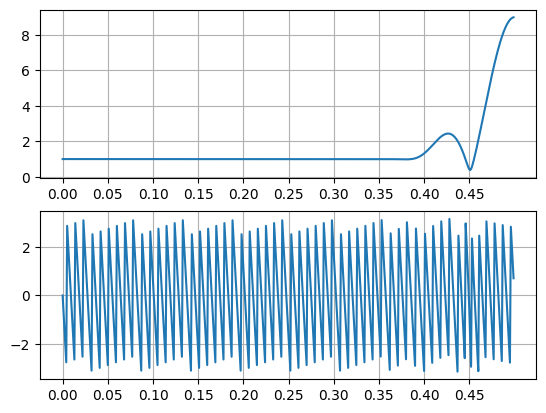

In [11]:
fig, ax = plt.subplots(2)
ax[0].plot(f_norm_test, np.abs(transf))
ax[1].plot(f_norm_test, np.angle(transf))
ax[0].set_xticks(f_norm_test[0::50])
ax[0].grid()
ax[1].set_xticks(f_norm_test[0::50])
ax[1].grid()